In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('NFLX.CSV')

In [5]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-06-04,362.679993,363.000000,355.510010,361.809998,361.809998,7682000
1,2018-06-05,363.320007,369.829987,361.410004,365.799988,365.799988,8358000
2,2018-06-06,367.779999,369.679993,363.329987,367.450012,367.450012,7712300
3,2018-06-07,368.540009,368.700012,357.799988,361.399994,361.399994,8278000
4,2018-06-08,358.059998,362.390015,356.250000,360.570007,360.570007,5225700


### Data preprocessing

In [9]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
df.info

<bound method DataFrame.info of             Date        Open        High         Low       Close   Adj Close  \
0     2018-06-04  362.679993  363.000000  355.510010  361.809998  361.809998   
1     2018-06-05  363.320007  369.829987  361.410004  365.799988  365.799988   
2     2018-06-06  367.779999  369.679993  363.329987  367.450012  367.450012   
3     2018-06-07  368.540009  368.700012  357.799988  361.399994  361.399994   
4     2018-06-08  358.059998  362.390015  356.250000  360.570007  360.570007   
...          ...         ...         ...         ...         ...         ...   
1254  2023-05-26  361.100006  383.760010  356.000000  378.880005  378.880005   
1255  2023-05-30  397.480011  405.109985  385.790009  392.980011  392.980011   
1256  2023-05-31  391.890015  396.260010  388.910004  395.230011  395.230011   
1257  2023-06-01  397.410004  407.519989  393.079987  403.130005  403.130005   
1258  2023-06-02  402.890015  406.579987  395.899994  400.470001  400.470001   

       

In [11]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,391.365139,397.598633,384.910731,391.398927,391.398927,7.947603e+06
std,116.986397,117.638085,115.913030,116.697727,116.697727,6.784545e+06
min,163.960007,172.059998,162.710007,166.369995,166.369995,1.144000e+06
25%,309.854995,315.650009,304.335007,310.550003,310.550003,4.351500e+06
50%,363.600006,368.880005,358.019989,363.600006,363.600006,6.229400e+06
75%,495.000000,502.895004,487.770005,494.455002,494.455002,9.353000e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,1.333875e+08


### Data splitting

In [12]:
from sklearn.model_selection import train_test_split

In [14]:
train, test = train_test_split(df, test_size = 0.2)
test_pred = test.copy()

In [15]:
test.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
795,2021-07-30,512.690002,519.789978,510.959991,517.570007,517.570007,2537100
934,2022-02-16,401.529999,401.559998,390.380005,398.079987,398.079987,5277700
155,2019-01-15,349.600006,357.220001,347.000000,354.640015,354.640015,21181200
555,2020-08-17,484.190002,486.239990,479.100006,482.350006,482.350006,2423500
988,2022-05-05,200.449997,200.710007,186.000000,188.320007,188.320007,13971300
932,2022-02-14,387.589996,409.359985,386.890015,396.570007,396.570007,7202200
998,2022-05-19,178.050003,186.300003,175.710007,183.479996,183.479996,10448500
623,2020-11-20,485.220001,494.760010,481.570007,488.239990,488.239990,4253400
445,2020-03-11,358.920013,362.980011,344.790009,349.920013,349.920013,6036000
206,2019-03-29,357.160004,358.250000,353.709991,356.559998,356.559998,4705600


In [16]:
train.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
703,2021-03-19,504.959991,513.190002,501.630005,512.179993,512.179993,4386400
1146,2022-12-20,281.239990,289.279999,280.809998,288.190002,288.190002,6918100
516,2020-06-22,455.010010,468.589996,454.209991,468.040009,468.040009,6272100
938,2022-02-23,382.720001,386.000000,366.660004,367.459991,367.459991,4614300
461,2020-04-02,364.079987,370.989990,360.059998,370.079987,370.079987,4592500
863,2021-11-04,685.890015,685.940002,665.500000,668.400024,668.400024,4865000
780,2021-07-09,531.000000,538.260010,528.580017,535.979980,535.979980,2777200
184,2019-02-27,363.500000,368.029999,359.799988,362.869995,362.869995,5629900
67,2018-09-07,342.200012,355.750000,341.250000,348.679993,348.679993,9105800
215,2019-04-11,365.000000,370.119995,360.809998,367.649994,367.649994,6526900


In [18]:
x_train = train[['Open','High','Low','Volume']].values
x_test = test[['Open','High','Low','Volume']].values

In [20]:
y_train = train[['Close']].values
y_test = test[['Close']].values

### Linear regression

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
model_lnr = LinearRegression()
model_lnr.fit(x_train, y_train)

LinearRegression()

In [25]:
y_pred = model_lnr.predict(x_test)
result = model_lnr.predict([[262.000000, 267.899994, 250.029999, 11896100]])
print(result)

[[257.42702037]]


In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,r2_score

### Model evaluation

In [27]:
# evaluating the model to the nearest 2 decimal places\
print("MSE",round(mean_squared_error(y_test,y_pred), 2))
print("RMSE",round(np.sqrt(mean_squared_error(y_test,y_pred)), 2))
print("MAE",round(mean_absolute_error(y_test,y_pred), 2))
print("MAPE",round(mean_absolute_percentage_error(y_test,y_pred), 2))
print("R2 Score : ", round(r2_score(y_test,y_pred), 2))

MSE 14.91
RMSE 3.86
MAE 2.98
MAPE 0.01
R2 Score :  1.0


In [28]:
# Let's visualise the model
def style():
    plt.figure(facecolor='black', figsize=(15,10))
    ax = plt.axes()

    ax.tick_params(axis='x', colors='white')    #setting up X-axis tick color to white
    ax.tick_params(axis='y', colors='white')    #setting up Y-axis tick color to white

    ax.spines['left'].set_color('white')        #setting up Y-axis spine color to white
    #ax.spines['right'].set_color('white')
    #ax.spines['top'].set_color('white')
    ax.spines['bottom'].set_color('white')      #setting up X-axis spine color to white

    ax.set_facecolor("black")                   # Setting the background color of the plot using set_facecolor() method

In [31]:
viz = df.copy()
viz['Date']=pd.to_datetime(viz['Date'],format='%Y-%m-%d')

In [32]:
data = pd.DataFrame(viz[['Date','Close']])
data=data.reset_index()
data=data.drop('index',axis=1)
data.set_index('Date', inplace=True)
data = data.asfreq('D')
data

,Close
Date,
2018-06-04,361.809998
2018-06-05,365.799988
2018-06-06,367.450012
2018-06-07,361.399994
2018-06-08,360.570007
...,...
2023-05-29,NaN
2023-05-30,392.980011
2023-05-31,395.230011


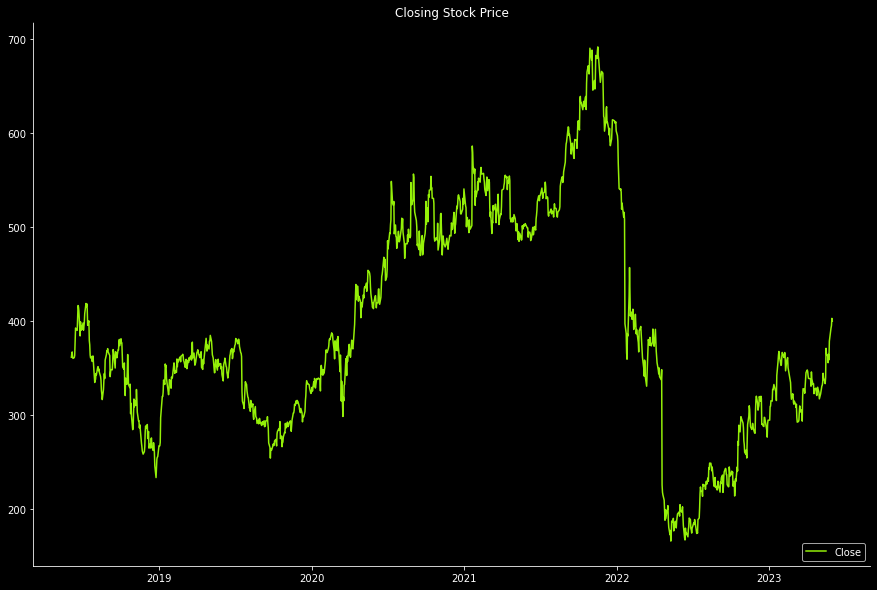

In [33]:
style()

plt.title('Closing Stock Price', color="white")
plt.plot(viz.Date, viz.Close, color="#94F008")
plt.legend(["Close"], loc ="lower right", facecolor='black', labelcolor='white')

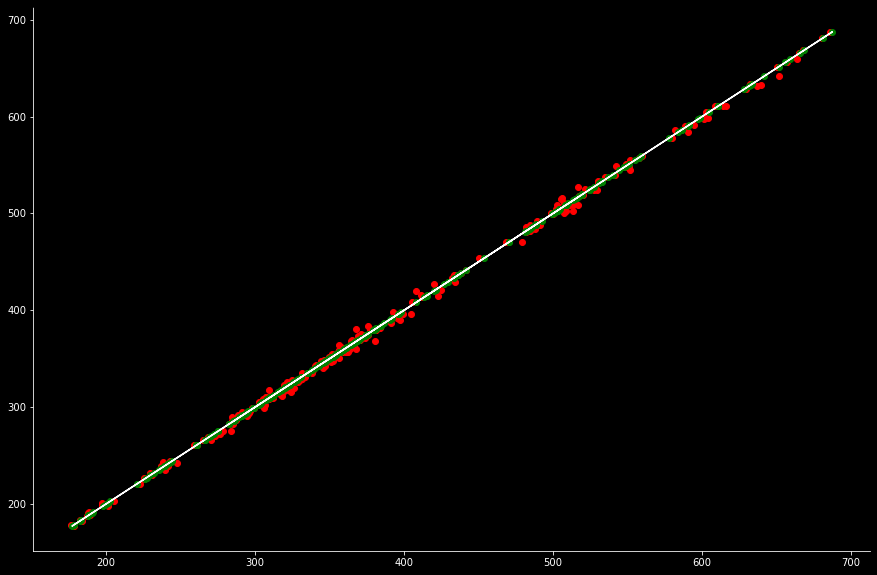

In [37]:
style()

plt.scatter(y_pred, y_test, color='red', marker='o')
plt.scatter(y_test, y_test, color='green')
plt.plot(y_test, y_test, color='white')

In [38]:
test_pred['Close_Prediction'] = y_pred
test_pred

,Date,Open,High,Low,Close,Adj Close,Volume,Close_Prediction
795,2021-07-30,512.690002,519.789978,510.959991,517.570007,517.570007,2537100,517.213841
934,2022-02-16,401.529999,401.559998,390.380005,398.079987,398.079987,5277700,392.854150
155,2019-01-15,349.600006,357.220001,347.000000,354.640015,354.640015,21181200,354.452772
555,2020-08-17,484.190002,486.239990,479.100006,482.350006,482.350006,2423500,481.973594
988,2022-05-05,200.449997,200.710007,186.000000,188.320007,188.320007,13971300,189.437957
...,...,...,...,...,...,...,...,...
305,2019-08-20,304.570007,305.000000,297.679993,298.989990,298.989990,7349900,299.628123
1192,2023-02-28,323.700012,327.619995,321.170013,322.130005,322.130005,3676100,324.898461
1105,2022-10-21,268.950012,290.750000,265.679993,289.570007,289.570007,24889100,284.534094
381,2019-12-06,304.700012,307.850006,302.600006,307.350006,307.350006,4457800,305.649309


In [40]:
test_pred[['Close', 'Close_Prediction']].describe().T

,count,mean,std,min,25%,50%,75%,max
Close,252.0,390.549564,119.163952,177.339996,310.165008,361.210007,488.575005,687.400024
Close_Prediction,252.0,390.982697,119.363539,176.911609,309.632512,363.292545,489.765071,685.616542


In [39]:
test_pred['Date'] = pd.to_datetime(test_pred['Date'],format='%Y-%m-%d')

In [42]:
output = pd.DataFrame(test_pred[['Date', 'Close', 'Close_Prediction']])
output = output.reset_index()
output = output.drop('index',axis=1)
output.set_index('Date', inplace=True)
output =  output.asfreq('D')
output

,Close,Close_Prediction
Date,,
2018-06-04,361.809998,357.506047
2018-06-05,NaN,NaN
2018-06-06,367.450012,366.057479
2018-06-07,NaN,NaN
2018-06-08,NaN,NaN
...,...,...
2023-05-20,NaN,NaN
2023-05-21,NaN,NaN
2023-05-22,NaN,NaN


In [44]:
output.to_csv('Netflix_Close_Prediction.csv', index=True)
print("CSV successfully saved!")

CSV successfully saved!
